## Софья Скобелева
## Самостоятельная работа №5
## Еще одна кластеризация и еще одна самостоятельная работа

# Кластеризация политических режимов

У нас имеется датасет, содержащий данные о странах и теория, что все страны можно отнести к одному из четырех видов, так называемая теория Даля. Попробуйте применить ее на практике и постараться выделить 4 кластера в данных по политическому устройству стран. Подробнее прочитать про датасет можно по [ссылке](https://www3.nd.edu/~mcoppedg/crd/Codebook.doc).

Импортируем модуль pandas.

In [2]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')

Загрузим наш датасет и посмотрим что находится внутри.

In [3]:
data = pd.read_csv('DahlDims.csv')
data.head()

,cname,abbr,year,yr,CONTEST,INCLUS,CONTESTstd,INCLUSstd,ContestationA,INCLUSA,...,ALTINF,POLY,ccode,ccodecow,ccodealp,ccodewb,f1mean,f2mean,f1sd,f2sd
0,Afghanistan,AFGN,1950,50,-1.150339342,-1.013598554,-1.011842735,-0.741150814,-1.150339342,-1.013598554,...,,,4,700,AFG,AFG,0.15,0.09,1.01,0.82
1,Afghanistan,AFGN,1951,51,-1.109144219,-0.956002727,-0.990235662,-0.790842427,-1.109144219,-0.956002727,...,,,4,700,AFG,AFG,0.13,0.06,1.01,0.89
2,Afghanistan,AFGN,1952,52,-1.106897206,-0.839698187,-1.011173094,-0.804507241,-1.106897206,-0.839698187,...,,,4,700,AFG,AFG,0.14,0.01,1.04,0.97
3,Afghanistan,AFGN,1953,53,-1.104317508,-0.675316224,-1.018490208,-0.547784602,-1.104317508,-0.675316224,...,,,4,700,AFG,AFG,0.13,0.06,1.04,0.90
4,Afghanistan,AFGN,1954,54,-1.107440167,-0.497937884,-1.061737774,-0.453082232,-1.107440167,-0.497937884,...,,,4,700,AFG,AFG,0.09,0.01,1.04,0.93


В нашем датасете есть 28 колонок, но работать мы будем с 2 из них. Это колонки CONTEST и INCLUS.
Строить мы будем распределение стран по этим параметрам за определенные год, например за 2000.  

## Задание 1. (0.5 балла). Сохраните отдельно наблюдения за 2000 год

In [4]:
data_2000 = data[data['year'] == 2000]
data_2000

,cname,abbr,year,yr,CONTEST,INCLUS,CONTESTstd,INCLUSstd,ContestationA,INCLUSA,...,ALTINF,POLY,ccode,ccodecow,ccodealp,ccodewb,f1mean,f2mean,f1sd,f2sd
50,Afghanistan,AFGN,2000,2000,-1.860250763,-3.632547535,-1.177129448,-1.956969586,,,...,,,4,700,AFG,AFG,0.525,0.495,0.915,0.675
101,Albania,ALBN,2000,2000,-0.055792334,0.529475222,0.473950014,0.852395775,,,...,,,8,339,ALB,ALB,0.525,0.495,0.915,0.675
140,Algeria,ALGR,2000,2000,-1.021945168,0.513831312,-0.410079829,0.841836136,,,...,,,12,615,DZA,DZA,0.525,0.495,0.915,0.675
191,Andorra,ANDO,2000,2000,0.400964891,-0.173187886,0.891882876,0.378098177,,,...,,,20,232,AND,ADO,0.525,0.495,0.915,0.675
217,Angola,ANGL,2000,2000,-1.36415187,-0.021909254,-0.723198961,0.480211254,,,...,,,24,540,AGO,AGO,0.525,0.495,0.915,0.675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,Venezuela,VNZL,2000,2000,0.309410571,0.531407245,0.808110672,0.85369989,,,...,,,862,101,VEN,VEN,0.525,0.495,0.915,0.675
7321,Vietnam,VNM,2000,2000,-1.766732031,0.980626826,-1.091559808,1.156923107,,,...,,,704,816,VNM,VNM,0.525,0.495,0.915,0.675
7382,Yemen,YMN,2000,2000,-1.38276152,-1.143566835,-0.740226791,-0.276907614,,,...,,,887,679,YEM,YEM,0.525,0.495,0.915,0.675
7526,Zambia,ZMBA,2000,2000,-0.484490396,0.053590424,0.081691287,0.531173536,,,...,,,894,551,ZMB,ZMB,0.525,0.495,0.915,0.675


## Задание 2. (0.5 балла). Сколько всего стран представлено для 2000 года?

In [5]:
print(f'Для 2000 года представлено {data_2000.shape[0]} стран.')

Для 2000 года представлено 192 стран.


## Задание 3. (0.5 балла). Переведите признаки INCLUS и CONTEST в числовой вид.

In [6]:
data_2000['INCLUS'] = data_2000['INCLUS'].astype(float)
data_2000['CONTEST'] = data_2000['CONTEST'].astype(float)

## Задание 4. (1 балл). Постройте график, где на оси X у нас колонка INCLUS, а по y - CONTEST. Сделайте выводы о верности теории Даля по рисунку.

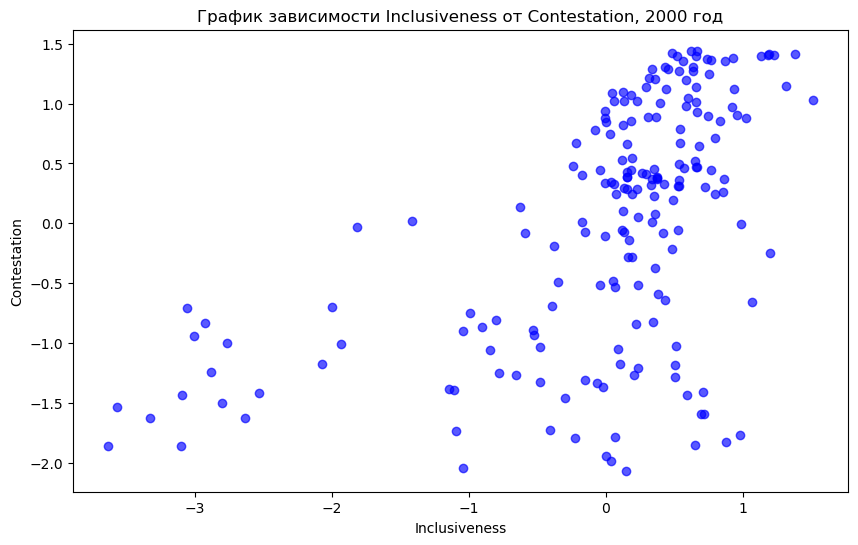

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_2000['INCLUS'], data_2000['CONTEST'], alpha = 0.65, color='blue')

plt.title('График зависимости Inclusiveness от Contestation, 2000 год')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')

plt.show()

Визуально можно выделить 3 кластера: в нижнем левом углу, в правом верхнем и правом нижнем. Такое разделение
опровергает теорию Даля, согласно которой выделяется 4 кластера политических режимов.

# Кластеризация с помощью KMeans

Кластеризатор KMeans разбивает множество элементов векторного пространства на заранее известное число кластеров k. Он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Алгоритм завершается, когда на какой-то итерации не происходит изменения внутрикластерного расстояния. Это происходит за конечное число итераций, так как количество возможных разбиений конечного множества конечно, а на каждом шаге суммарное квадратичное отклонение V уменьшается, поэтому зацикливание невозможно.

Импортируем модуль KMeans из sklearn.

In [8]:
from sklearn.cluster import KMeans

## Задание 5. (2,5 балла). Возьмите два признака: INCLUS и CONTEST и обучите кластеризатор для 4 кластеров (как сказано в теории Даля)

In [9]:
X = data_2000[['INCLUS', 'CONTEST']].values

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)

kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

Посмотрим как наши данные пометились.

In [10]:
kmeans.labels_

array([1, 0, 2, 0, 2, 0, 3, 0, 3, 3, 2, 0, 1, 0, 0, 2, 3, 0, 3, 2, 3, 0,
       3, 3, 1, 0, 2, 1, 2, 2, 3, 0, 0, 2, 3, 2, 0, 1, 1, 2, 3, 0, 0, 2,
       3, 3, 3, 0, 0, 3, 0, 2, 3, 2, 2, 3, 0, 2, 3, 3, 2, 2, 0, 3, 0, 3,
       0, 0, 0, 2, 3, 0, 3, 3, 3, 0, 0, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0,
       2, 3, 1, 2, 2, 3, 0, 0, 2, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 3, 0, 3, 0, 3, 2, 0, 1, 0, 0, 0, 3, 3, 3, 0, 0, 3, 1, 1, 0, 3,
       3, 0, 0, 0, 3, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 3, 3, 0,
       1, 3, 3, 0, 0, 0, 0, 2, 0, 2, 3, 3, 2, 3, 2, 0, 0, 0, 2, 1, 3, 2,
       0, 2, 0, 2, 0, 1, 3, 3, 3, 2, 0, 0, 2, 2, 0, 2], dtype=int32)

Всем нашим данным были присвоены лейблы от 0 до 3.

Создадим новый Датафрейм, в который поместим столбцы INCLUS, CONTEST и новый столбец Labels в котором мы будем хранить помеченные кластерезатором данные.

In [11]:
draw = pd.DataFrame({'INCLUS': data_2000['INCLUS'],
                   'CONTEST': data_2000['CONTEST'],
                   'Labels': kmeans.labels_})

Теперь давайте построим тот же график что и в начале, но уже с окраской кластеров. Для этого используем seaborn.

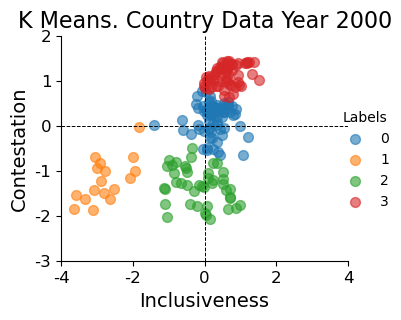

In [12]:
import seaborn as sns

g = sns.FacetGrid(draw, hue="Labels")
g.map(plt.scatter, "INCLUS", "CONTEST", alpha=0.6, s=50)
g.add_legend()

plt.title('K Means. Country Data Year 2000', fontsize=16)
plt.xlabel('Inclusiveness', fontsize=14)
plt.ylabel('Contestation', fontsize=14)
plt.yticks((-3, -2, -1, 0, 1, 2), ("-3", "-2", "-1", "0", "1", "2"), fontsize=12)
plt.xticks((-4, -2, 0, 2, 4), ("-4", "-2", "0", "2", "4"), fontsize=12)
plt.axvline(x=0, linestyle='--', color='black', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='black', linewidth=0.7)

plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.9)

plt.show()

Приведем еще один вариант визуализации:

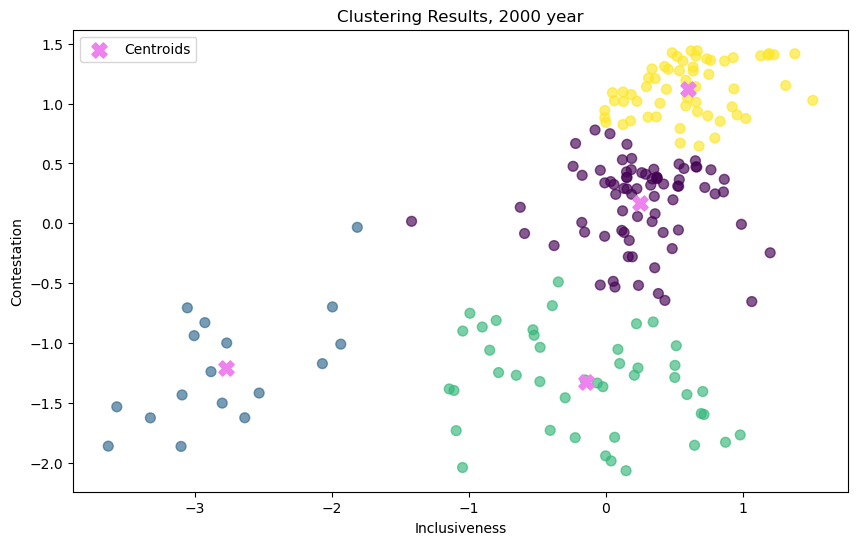

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.65, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=120, c='violet', marker='X', label='Centroids')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.title('Clustering Results, 2000 year')
plt.legend()
plt.show()

## Задание 6. (2,5 балла). С помощью любого известного Вам способа (мы их знаем всего 2) найдите оптимальное количество кластеров с математической точки зрения. Обучите кластеризатор для этой ситуации. Визуализируйте результат, сделайте выводы.

Надем оптимальное количество кластеров при помощи метода локтя:

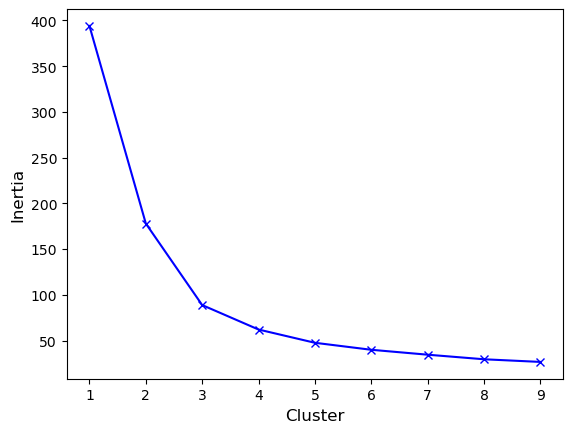

In [14]:
def get_inertia(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, n_init=10, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, X))
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

Согласно данному методу оптимальное количество кластеров равно 3 - начиная с этого числа кластеров инерция уменьшается уже не так быстро.

Надем оптимальное количество кластеров при помощи метода силуэта:

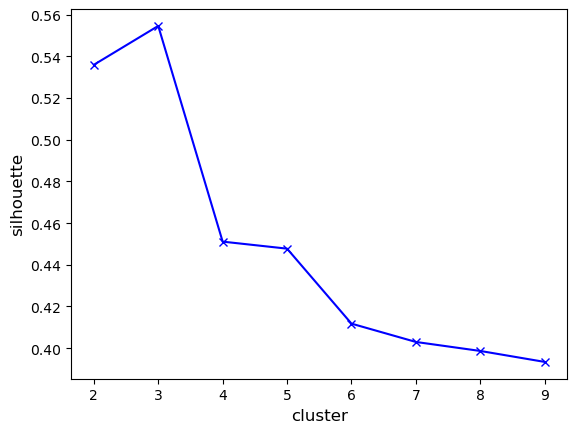

In [15]:
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X):
    model =  KMeans(n_clusters=cluster_num, n_init=10,random_state=42)
    model.fit(X)
    silhouette = silhouette_score(X, model.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i, X))

plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

Согласно данному методу оптимальное количество кластеров тоже равно 3.

Обучим кластеризатор для трех кластеров:

In [16]:
X = data_2000[['INCLUS', 'CONTEST']].values

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [17]:
cluster_labels = kmeans.labels_
cluster_labels

array([2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1,
       0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int32)

Визуализируем результат:

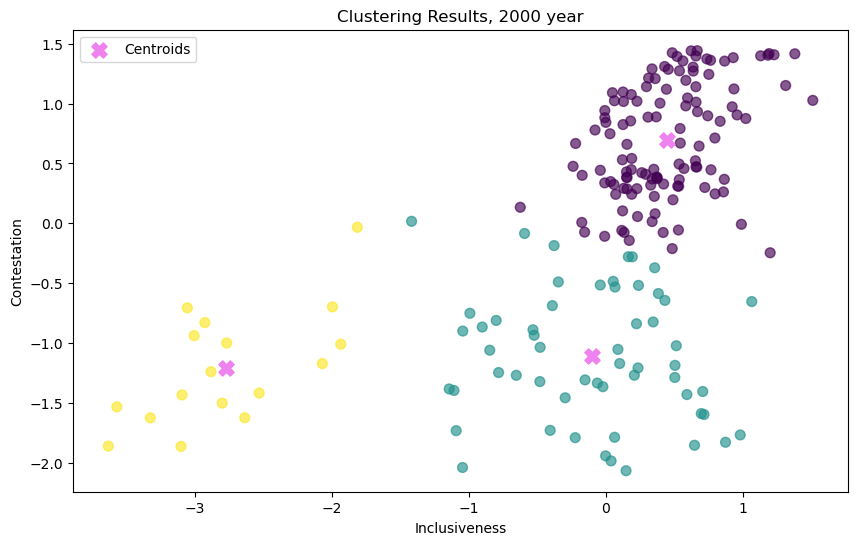

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.65, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=120, c='violet', marker='X', label='Centroids')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.title('Clustering Results, 2000 year')
plt.legend()
plt.show()

Таким образом, оптимальное число кластеров для 2000 года равно трем, что опровергает теорию Даля, согласно которой по политическому устройству стран выделяется 4 кластера.

## Задание 7. (2,5 балла). Повторите все то же самое для 1950 года. Произошли ли какие-то изменения? Если да, то какие?

Сохраним отдельно наблюдения за 1950 год:

In [19]:
data_1950 = data[data['year'] == 1950]
data_1950

,cname,abbr,year,yr,CONTEST,INCLUS,CONTESTstd,INCLUSstd,ContestationA,INCLUSA,...,ALTINF,POLY,ccode,ccodecow,ccodealp,ccodewb,f1mean,f2mean,f1sd,f2sd
0,Afghanistan,AFGN,1950,50,-1.150339342,-1.013598554,-1.011842735,-0.741150814,-1.150339342,-1.013598554,...,,,4,700,AFG,AFG,0.15,0.09,1.01,0.82
51,Albania,ALBN,1950,50,-1.188960776,0.959032625,-1.050850384,0.876406753,-1.188960776,0.959032625,...,,,8,339,ALB,ALB,0.15,0.09,1.01,0.82
141,Andorra,ANDO,1950,50,0,0,0.15,0.09,0,0,...,,,20,232,AND,ADO,0.15,0.09,1.01,0.82
238,Argentina,ARGN,1950,50,-0.316937701,0.418327978,-0.170107078,0.433028942,-0.316937701,0.418327978,...,,,32,160,ARG,ARG,0.15,0.09,1.01,0.82
301,Australia,AUSL,1950,50,1.362703768,0.870069914,1.526330806,0.803457329,1.362703768,0.870069914,...,,,36,900,AUS,AUS,0.15,0.09,1.01,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,USSR,USSR,1950,50,-1.19719885,1.090141086,-1.059170838,0.98391569,-1.19719885,1.090141086,...,,,810,365,SUN,,0.15,0.09,1.01,0.82
7246,Venezuela,VNZL,1950,50,-1.317769793,-2.342455244,-1.18094749,-1.8308133,-1.317769793,-2.342455244,...,,,862,101,VEN,VEN,0.15,0.09,1.01,0.82
7344,Vietnam. South,VNMS,1950,50,0,0,0.15,0.09,0,0,...,,,999,817,VDR,,0.15,0.09,1.01,0.82
7383,Yemen. North,YMNN,1950,50,-1.345923794,-2.461634678,-1.209383032,-1.928540436,-1.345923794,-2.461634678,...,,,886,678,YEM,,0.15,0.09,1.01,0.82


In [20]:
print(f'Для 2000 года представлено {data_1950.shape[0]} стран.')

Для 2000 года представлено 86 стран.


Переведем признаки `INCLUS` и `CONTEST` в числовой вид:

In [21]:
data_1950['INCLUS'] = data_1950['INCLUS'].astype(float)
data_1950['CONTEST'] = data_1950['CONTEST'].astype(float)

Построим график зависимости `INCLUS` от `CONTEST`:

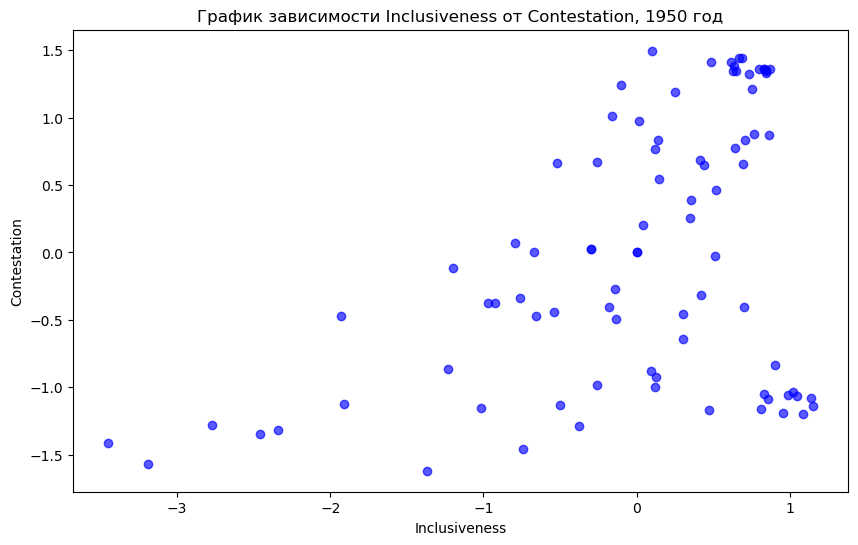

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_1950['INCLUS'], data_1950['CONTEST'], alpha = 0.65, color='blue')

plt.title('График зависимости Inclusiveness от Contestation, 1950 год')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')

plt.show()

Визуально не так легко выделить четкие кластеры, возможно, можно выделить 4 кластера: в правом верхнем углу, в правом нижнем, ближе к центру и в левом нижнем углу.

Обучим кластеризатор для 4 кластеров:

In [23]:
X = data_1950[['INCLUS', 'CONTEST']].values

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)

kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [24]:
kmeans.labels_

array([0, 3, 0, 3, 1, 1, 1, 2, 0, 1, 3, 1, 1, 2, 0, 1, 1, 3, 1, 3, 1, 0,
       3, 0, 1, 1, 3, 1, 1, 1, 3, 0, 3, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 3,
       3, 1, 3, 0, 1, 0, 0, 0, 1, 2, 1, 1, 3, 1, 0, 0, 3, 0, 0, 1, 3, 0,
       3, 0, 2, 1, 2, 1, 1, 1, 0, 3, 3, 1, 1, 1, 1, 3, 2, 0, 2, 3],
      dtype=int32)

In [25]:
draw = pd.DataFrame({'INCLUS': data_1950['INCLUS'],
                   'CONTEST': data_1950['CONTEST'],
                   'Labels': kmeans.labels_})

Визуализируем результат:

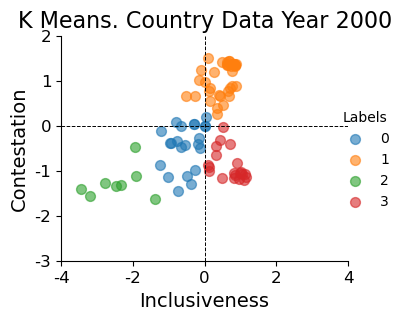

In [26]:
import seaborn as sns

g = sns.FacetGrid(draw, hue="Labels")
g.map(plt.scatter, "INCLUS", "CONTEST", alpha=0.6, s=50)
g.add_legend()

plt.title('K Means. Country Data Year 2000', fontsize=16)
plt.xlabel('Inclusiveness', fontsize=14)
plt.ylabel('Contestation', fontsize=14)
plt.yticks((-3, -2, -1, 0, 1, 2), ("-3", "-2", "-1", "0", "1", "2"), fontsize=12)
plt.xticks((-4, -2, 0, 2, 4), ("-4", "-2", "0", "2", "4"), fontsize=12)
plt.axvline(x=0, linestyle='--', color='black', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='black', linewidth=0.7)

plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.9)

plt.show()

Приведем еще один вариант визуализации:

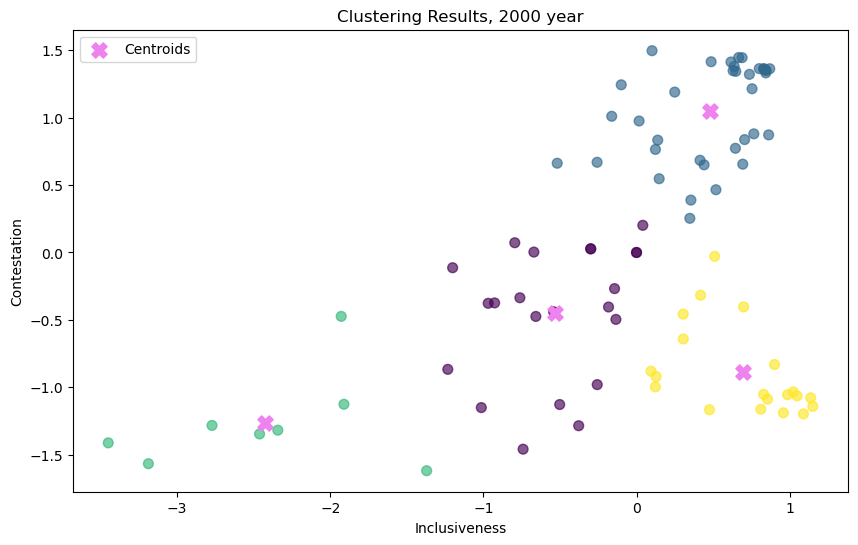

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.65, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=120, c='violet', marker='X', label='Centroids')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.title('Clustering Results, 2000 year')
plt.legend()
plt.show()

Надем оптимальное количество кластеров при помощи метода локтя:

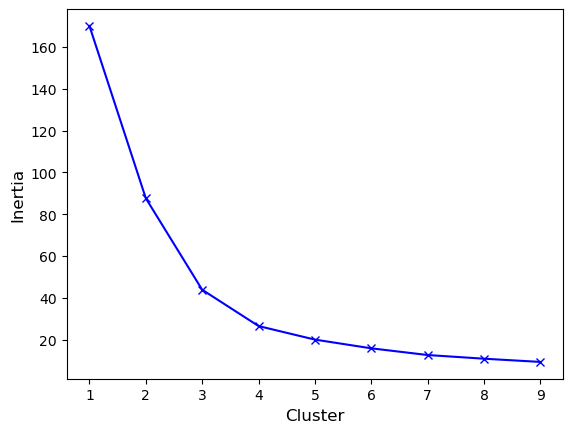

In [28]:
def get_inertia(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, n_init=10, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, X))
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

Согласно данному методу оптимальное количество кластеров равно 4 - начиная с этого числа кластеров инерция уменьшается уже не так быстро.

Надем оптимальное количество кластеров при помощи метода силуэта:

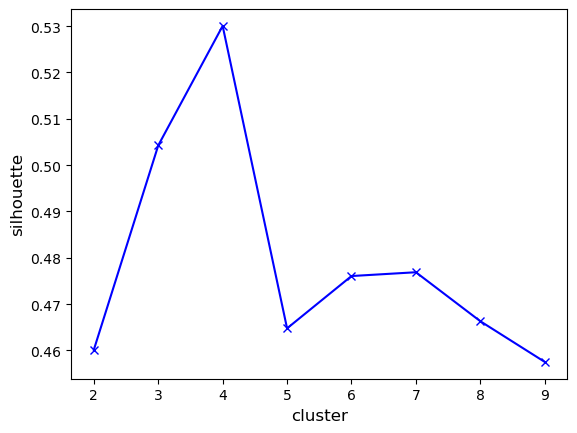

In [29]:
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X):
    model =  KMeans(n_clusters=cluster_num, n_init=10,random_state=42)
    model.fit(X)
    silhouette = silhouette_score(X, model.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i, X))

plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

Согласно данному методу оптимальное количество кластеров тоже равно 4.

Обучим кластеризатор для четырех кластеров:

In [30]:
X = data_1950[['INCLUS', 'CONTEST']].values

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)

kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [31]:
cluster_labels = kmeans.labels_
cluster_labels

array([0, 3, 0, 3, 1, 1, 1, 2, 0, 1, 3, 1, 1, 2, 0, 1, 1, 3, 1, 3, 1, 0,
       3, 0, 1, 1, 3, 1, 1, 1, 3, 0, 3, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 3,
       3, 1, 3, 0, 1, 0, 0, 0, 1, 2, 1, 1, 3, 1, 0, 0, 3, 0, 0, 1, 3, 0,
       3, 0, 2, 1, 2, 1, 1, 1, 0, 3, 3, 1, 1, 1, 1, 3, 2, 0, 2, 3],
      dtype=int32)

Визуализируем результат:

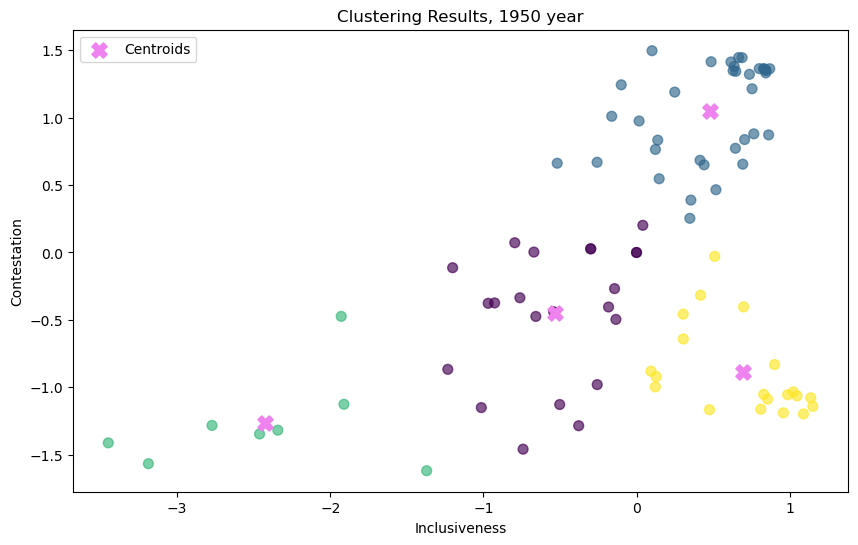

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.65, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=120, c='violet', marker='X', label='Centroids')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.title('Clustering Results, 1950 year')
plt.legend()
plt.show()

Оптимальное число кластеров для 1950 года равно четырем, что подтверждает теорию Даля.  

Таким образом, результаты кластеризации для 1950 года и 2000 года различаются: для 2000 года оптимальное число кластеров равно 3, в то время как для 1950 года оптимальное число кластеров равно 4.   

Даль выделял 4 типа режима (закрытая гегемония, открытая гегемония, соревновательная олигархия и полиархия) в 1970-е годы. Характеристики режимов трансфоримируются, поэтому результаты для 1950 и 2000 годов могут отличаться.